<a href="https://colab.research.google.com/github/BenoCharlo/Molecular_prop/blob/master/Molecular_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"benocharles","key":"b479645cbce91426f9186524938144ed"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c champs-scalar-coupling

 92% 41.0M/44.5M [00:00<00:00, 33.1MB/s]
100% 44.5M/44.5M [00:00<00:00, 53.8MB/s]
 67% 9.00M/13.4M [00:00<00:00, 24.5MB/s]
100% 13.4M/13.4M [00:00<00:00, 33.8MB/s]
 97% 61.0M/62.9M [00:01<00:00, 34.4MB/s]
100% 62.9M/62.9M [00:01<00:00, 48.2MB/s]
 84% 41.0M/48.7M [00:01<00:00, 21.4MB/s]
100% 48.7M/48.7M [00:01<00:00, 29.5MB/s]
 98% 85.0M/86.6M [00:01<00:00, 58.0MB/s]
100% 86.6M/86.6M [00:01<00:00, 68.7MB/s]
 94% 5.00M/5.31M [00:00<00:00, 18.4MB/s]
100% 5.31M/5.31M [00:00<00:00, 17.7MB/s]
  0% 0.00/497k [00:00<?, ?B/s]
100% 497k/497k [00:00<00:00, 154MB/s]
 54% 5.00M/9.24M [00:00<00:00, 18.1MB/s]
100% 9.24M/9.24M [00:00<00:00, 30.8MB/s]
 82% 41.0M/49.8M [00:00<00:00, 29.8MB/s]
100% 49.8M/49.8M [00:00<00:00, 57.0MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 114MB/s]


In [5]:
!ls

dipole_moments.csv.zip		    sample_submission.csv.zip
kaggle.json			    scalar_coupling_contributions.csv.zip
magnetic_shielding_tensors.csv.zip  structures.csv.zip
mulliken_charges.csv.zip	    structures.zip
potential_energy.csv.zip	    test.csv.zip
sample_data			    train.csv.zip


In [0]:
import os

os.listdir(".")

['.config',
 'dipole_moments.csv.zip',
 'scalar_coupling_contributions.csv.zip',
 'mulliken_charges.csv.zip',
 'test.csv.zip',
 'train.csv.zip',
 'magnetic_shielding_tensors.csv.zip',
 'mulliken_charges.csv',
 'structures.csv.zip',
 'structures.zip',
 'kaggle.json',
 'sample_submission.csv.zip',
 'potential_energy.csv.zip',
 'sample_data']

In [7]:
from zipfile import ZipFile

filenames = [
    "mulliken_charges.csv.zip", 'train.csv.zip', 
    'test.csv.zip','structures.csv.zip']

for file in filenames:
  with ZipFile(file, 'r') as zip:
    zip.extractall()
    print('Done')

Done
Done
Done
Done


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


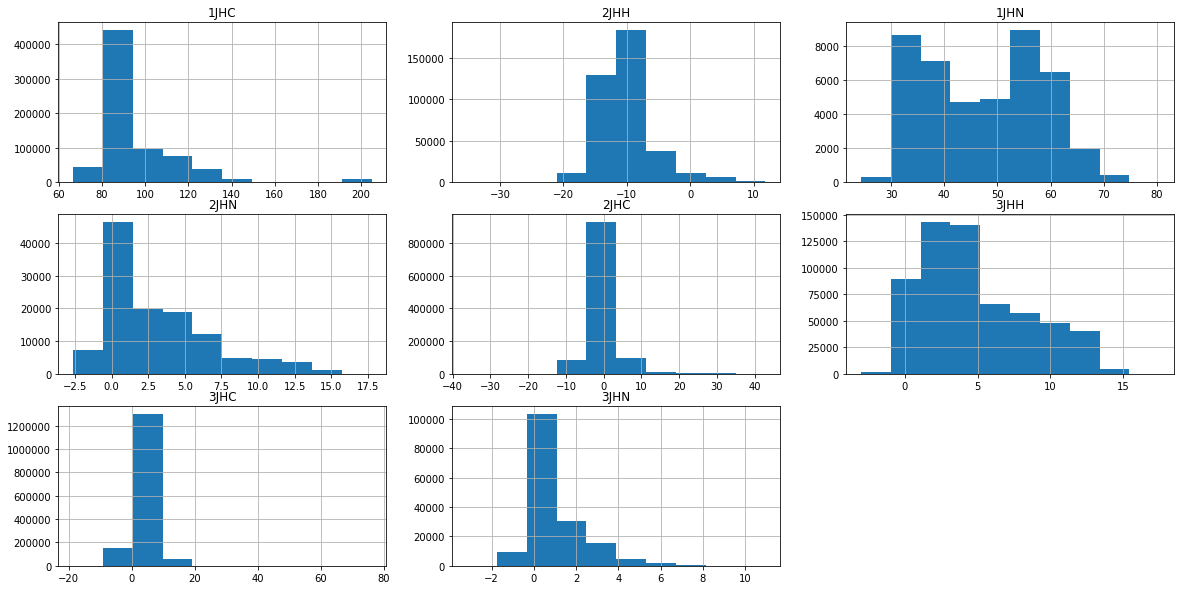

In [14]:
i=1
_= plt.figure(figsize=(20,10))
for type_ in train.type.unique():
    _ = plt.subplot(3,3,i)
    train.loc[train['type']== type_,'scalar_coupling_constant'].hist()
    _ = plt.title(type_)
    i+=1

#Simple Stats

In [15]:
train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [16]:
train.shape

(4658147, 6)

#Feature engineering

In [0]:
y = train.scalar_coupling_constant
train.drop(['scalar_coupling_constant'], axis=1, inplace=True)

train['origin'] = [1]*train.shape[0]
test['origin'] = [0]*test.shape[0]

all_data = pd.concat([train,test], axis=0)

In [22]:
all_data.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,origin
0,0,dsgdb9nsd_000001,1,0,1JHC,1
1,1,dsgdb9nsd_000001,1,2,2JHH,1
2,2,dsgdb9nsd_000001,1,3,2JHH,1
3,3,dsgdb9nsd_000001,1,4,2JHH,1
4,4,dsgdb9nsd_000001,2,0,1JHC,1
5,5,dsgdb9nsd_000001,2,3,2JHH,1
6,6,dsgdb9nsd_000001,2,4,2JHH,1
7,7,dsgdb9nsd_000001,3,0,1JHC,1
8,8,dsgdb9nsd_000001,3,4,2JHH,1
9,9,dsgdb9nsd_000001,4,0,1JHC,1


In [26]:
a = all_data.type.iloc[0]

[a[0], a[1], a[2], a[3]]

['1', 'J', 'H', 'C']

In [0]:
all_data['type_first'] = all_data.type.map(lambda type: type[0])
all_data['type_last'] = all_data.type.map(lambda type: type[3])

In [28]:
all_data.head()

,id,molecule_name,atom_index_0,atom_index_1,type,origin,type_first,type_second,type_third,type_fourth
0,0,dsgdb9nsd_000001,1,0,1JHC,1,1,J,H,C
1,1,dsgdb9nsd_000001,1,2,2JHH,1,2,J,H,H
2,2,dsgdb9nsd_000001,1,3,2JHH,1,2,J,H,H
3,3,dsgdb9nsd_000001,1,4,2JHH,1,2,J,H,H
4,4,dsgdb9nsd_000001,2,0,1JHC,1,1,J,H,C


In [33]:
all_data.type_fourth.value_counts()/all_data.shape[0]*100

C    72.116685
H    20.788284
N     7.095032
Name: type_fourth, dtype: float64